In [1]:
#using Revise
addprocs(4)
using CMDPs
using POMDPs, POMDPToolbox, POMDPModels, MCTS
using DataFrames
using Plots; gr()

Plots.GRBackend()

In [2]:
mdp = MountainCar()
b = DPWBandit(mdp)
solver = ModularSolver(mdp, b)
policy = solve(solver, mdp);

In [3]:
s0 = initial_state(mdp, Base.GLOBAL_RNG)

(-0.5, 0.0)

In [4]:
hr = HistoryRecorder(; max_steps=10, rng=Base.GLOBAL_RNG)
h = simulate(hr, mdp, policy, s0);

In [5]:
h.state_hist

11-element Array{Tuple{Float64,Float64},1}:
 (-0.5, 0.0)             
 (-0.501177, -0.00117684)
 (-0.503522, -0.00234488)
 (-0.505017, -0.00149537)
 (-0.507652, -0.00263466)
 (-0.510406, -0.00275422)
 (-0.513259, -0.00285314)
 (-0.51719, -0.00393067) 
 (-0.522169, -0.00497874)
 (-0.527158, -0.00498946)
 (-0.531121, -0.00396277)

In [6]:
h.action_hist

10-element Array{Float64,1}:
 -1.0
 -1.0
  1.0
 -1.0
  0.0
  0.0
 -1.0
 -1.0
  0.0
  1.0

In [7]:
h.reward_hist

10-element Array{Float64,1}:
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0

In [8]:
## Study

In [9]:
study = RewardvsN(MountainCar)

CMDPs.RewardvsN
  mdp: POMDPModels.MountainCar
  bandits: Array{DataType}((2,))
  n_seeds: Int64 20
  n_iters: Array{Int64}((6,)) [100, 500, 1000, 2000, 5000, 10000]
  max_steps: Int64 20


In [10]:
result = run_study(study)

CMDPs.RewardvsNResult("Mountain Car", 240×4 DataFrames.DataFrame
│ Row │ alg          │ seed │ n_iters │ r_total │
├─────┼──────────────┼──────┼─────────┼─────────┤
│ 1   │ DPWBandit    │ 1    │ 100     │ -20.0   │
│ 2   │ DPWBandit    │ 2    │ 100     │ -20.0   │
│ 3   │ DPWBandit    │ 3    │ 100     │ -20.0   │
│ 4   │ DPWBandit    │ 4    │ 100     │ -20.0   │
│ 5   │ DPWBandit    │ 5    │ 100     │ -20.0   │
│ 6   │ DPWBandit    │ 6    │ 100     │ -20.0   │
│ 7   │ DPWBandit    │ 7    │ 100     │ -20.0   │
│ 8   │ DPWBandit    │ 8    │ 100     │ -20.0   │
│ 9   │ DPWBandit    │ 9    │ 100     │ -20.0   │
│ 10  │ DPWBandit    │ 10   │ 100     │ -20.0   │
│ 11  │ DPWBandit    │ 11   │ 100     │ -20.0   │
⋮
│ 229 │ RandomBandit │ 9    │ 10000   │ -20.0   │
│ 230 │ RandomBandit │ 10   │ 10000   │ -20.0   │
│ 231 │ RandomBandit │ 11   │ 10000   │ -20.0   │
│ 232 │ RandomBandit │ 12   │ 10000   │ -20.0   │
│ 233 │ RandomBandit │ 13   │ 10000   │ -20.0   │
│ 234 │ RandomBandit │ 14   │ 100

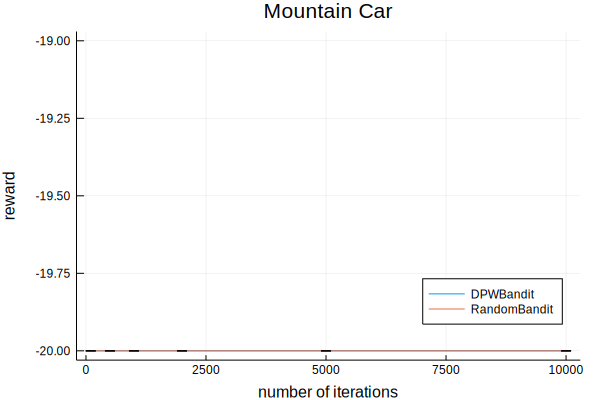

In [11]:
p=Plots.plot(result)

In [13]:
savefig(p, "./RvN_mountaincar.pdf")